In [1]:
# It won't fill in the null values

# val_prob = dict(df.loc[df['price']>1000000, 'waterfront'].value_counts(1))
# prob = list(val_prob.values())
# val = list(val_prob.keys())
# mask = df['price']>1000000
# df.loc[mask, 'waterfront'].fillna(value=np.random.choice(val, p=prob), inplace=True, axis=0)
# print(df.loc[mask, 'waterfront'].isna().sum())
# mask2 = df['price']<1000000
# df.loc[mask2, 'waterfront'].fillna(0, inplace=True)
# df['waterfront'].isna().sum()
# np.random.choice(val, p=prob)

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


## OVERVIEW OF OSEMiN

<img src='https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/OSEMN.png' width=800>

<center><a href="https://www.kdnuggets.com/2018/02/data-science-command-line-book-exploring-data.html"> 
    </a></center>


> <font size=2em>The Data Science Process we'll be using during this section--OSEMiN (pronounced "OH-sum", rhymes with "possum").  This is the most straightforward of the Data Science Processes discussed so far.  **Note that during this process, just like the others, the stages often blur together.***  It is completely acceptable (and ***often a best practice!) to float back and forth** between stages as you learn new things about your problem, dataset, requirements, etc.  
It's quite common to get to the modeling step and realize that you need to scrub your data a bit more or engineer a different feature and jump back to the "Scrub" stage, or go all the way back to the "Obtain" stage when you realize your current data isn't sufficient to solve this problem. 
As with any of these frameworks, *OSEMiN is meant to be treated as guidelines, not law. 
</font>


### OSEMN DETAILS

**OBTAIN**

- This step involves understanding stakeholder requirements, gathering information on the problem, and finally sourcing data that we think will be necessary for solving this problem. 

**SCRUB**

- During this stage, we'll focus on preprocessing our data.  Important steps such as identifying and removing null values, dealing with outliers, normalizing data, and feature engineering/feature selection are handled around this stage.  The line with this stage really blurs with the _Explore_ stage, as it is common to only realize that certain columns require cleaning or preprocessing as a result of the visualzations and explorations done during Step 3.  

- Note that although technically, categorical data should be one-hot encoded during this step, in practice, it's usually done after data exploration.  This is because it is much less time-consuming to visualize and explore a few columns containing categorical data than it is to explore many different dummy columns that have been one-hot encoded. 

**EXPLORE**

- This step focuses on getting to know the dataset you're working with. As mentioned above, this step tends to blend with the _Scrub_ step mentioned above.  During this step, you'll create visualizations to really get a feel for your dataset.  You'll focus on things such as understanding the distribution of different columns, checking for multicollinearity, and other tasks liek that.  If your project is a classification task, you may check the balance of the different classes in your dataset.  If your problem is a regression task, you may check that the dataset meets the assumptions necessary for a regression task.  

- At the end of this step, you should have a dataset ready for modeling that you've thoroughly explored and are extremely familiar with.  

**MODEL**

- This step, as with the last two frameworks, is also pretty self-explanatory. It consists of building and tuning models using all the tools you have in your data science toolbox.  In practice, this often means defining a threshold for success, selecting machine learning algorithms to test on the project, and tuning the ones that show promise to try and increase your results.  As with the other stages, it is both common and accepted to realize something, jump back to a previous stage like _Scrub_ or _Explore_, and make some changes to see how it affects the model.  

**iNTERPRET**

- During this step, you'll interpret the results of your model(s), and communicate results to stakeholders.  As with the other frameworks, communication is incredibily important! During this stage, you may come to realize that further investigation is needed, or more data.  That's totally fine--figure out what's needed, go get it, and start the process over! If your results are satisfactory to all stakeholders involved, you may also go from this stage right into productionizing your model and automating processes necessary to support it.  





## PROCESS CHECKLIST


> Keep in mind that it is normal to jump between the OSEMN phases and some of them will blend together, like SCRUB and EXPLORE.

1. **[OBTAIN](#OBTAIN)**
    - Import data, inspect, check for datatypes to convert and null values
    - Display header and info.
    - Drop any unneeded columns, if known (`df.drop(['col1','col2'],axis=1,inplace=True`)
    <br><br>


2. **[SCRUB](#SCRUB)**
    - Recast data types, identify outliers, check for multicollinearity, normalize data**
    - Check and cast data types
        - [ ] Check for #'s that are store as objects (`df.info()`,`df.describe()`)
            - when converting to #'s, look for odd values (like many 0's), or strings that can't be converted.
            - Decide how to deal weird/null values (`df.unique()`, `df.isna().sum()`)
            - `df.fillna(subset=['col_with_nulls'],'fill_value')`, `df.replace()`
        - [ ] Check for categorical variables stored as integers.
            - May be easier to tell when you make a scatter plotm or `pd.plotting.scatter_matrix()`
            
    - [ ] Check for missing values  (df.isna().sum())
        - Can drop rows or colums
        - For missing numeric data with median or bin/convert to categorical
        - For missing categorical data: make NaN own category OR replace with most common category
    - [ ] Check for multicollinearity
        - Use seaborn to make correlation matrix plot 
        - Good rule of thumb is anything over 0.75 corr is high, remove the variable that has the most correl with the largest # of variables
    - [ ] Normalize data (may want to do after some exploring)
        - Most popular is Z-scoring (but won't fix skew) 
        - Can log-transform to fix skewed data
    
    
3. **[EXPLORE](#EXPLORE)**
    - [ ] Check distributions, outliers, etc**
    - [ ] Check scales, ranges (df.describe())
    - [ ] Check histograms to get an idea of distributions (df.hist()) and data transformations to perform.
        - Can also do kernel density estimates
    - [ ] Use scatter plots to check for linearity and possible categorical variables (`df.plot("x","y")`)
        - categoricals will look like vertical lines
    - [ ] Use `pd.plotting.scatter_matrix(df)` to visualize possible relationships
    - [ ] Check for linearity.
   
   
4. **[MODEL](#MODEL)**

    - **Fit an initial model:** 
        - Run an initial model and get results

    - **Holdout validation / Train/test split**
        - use sklearn `train_test_split`
    
    
5. **[iNTERPRET](#iNTERPRET)**
    - **Assessing the model:**
        - Assess parameters (slope,intercept)
        - Check if the model explains the variation in the data (RMSE, F, R_square)
        - *Are the coeffs, slopes, intercepts in appropriate units?*
        - *Whats the impact of collinearity? Can we ignore?*
        <br><br>
    - **Revise the fitted model**
        - Multicollinearity is big issue for lin regression and cannot fully remove it
        - Use the predictive ability of model to test it (like R2 and RMSE)
        - Check for missed non-linearity
        
       
6. **Interpret final model and draw >=3 conclusions and recommendations from dataset**

<div style="display:block;border-bottom:solid red 3px;padding:1.4em;color:red;font-size:30pt;display:inline-block;line-height:1.5em;">
DELETE THIS CELL AND EVERYTHING ABOVE FROM YOUR FINAL NOTEBOOK
</div>

# Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time:
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:
* Video of 5-min Non-Technical Presentation:

## TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>
 
- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
___

# INTRODUCTION

> Explain the point of your project and what question you are trying to answer with your modeling.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***



# OBTAIN

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***


In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

df = pd.read_csv('../dsc-phase-2-project/data/kc_house_data.csv', thousands=r',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# https://re-thought.com/how-to-suppress-scientific-notation-in-pandas/
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Data should be a datetime object

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.describe()
# id isn't truly an int
# price has a very large SD and outliers
# it seems that there may be a couple of outlier values driving up the max across columns
# floors, waterfront, view, condition, and grade are ordinal categorical values
# zipcode, lat, long isn't truly an int
# waterfront may be a binary variable
# year renovated contains null values, probably due to homes that have not yet been renovated

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


<AxesSubplot:>

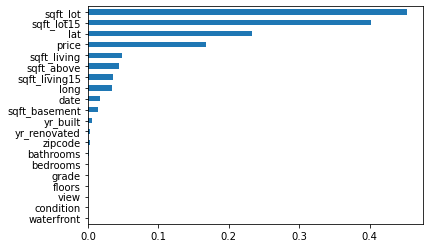

In [6]:
# Show the proportion of unique values per column

# Bathrooms, bedrooms, grade, floors, view, condition, and waterfront to have a very small number 
# of unique values. They may be categorical/ordinal
# Zipcode, year renovated, year built, basement, sqft living, sqft above, sqft living15 are all below 10%

nu_dict = dict(df.nunique())
val_list = list(nu_dict.values())

percent = []
for col, val in zip(df.columns, val_list):
    percent.append(val/len(df[col]))
percent  
unique_per_column = pd.Series(data=percent, index=df.columns)
unique_per_column.drop('id').sort_values(ascending=True).plot(kind='barh')

In [7]:
# nu_dict


In [8]:
low_nunique = []
for k,v in nu_dict.items():
    if v < 15:
        low_nunique.append(k)
    else:
        pass
low_nunique

['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

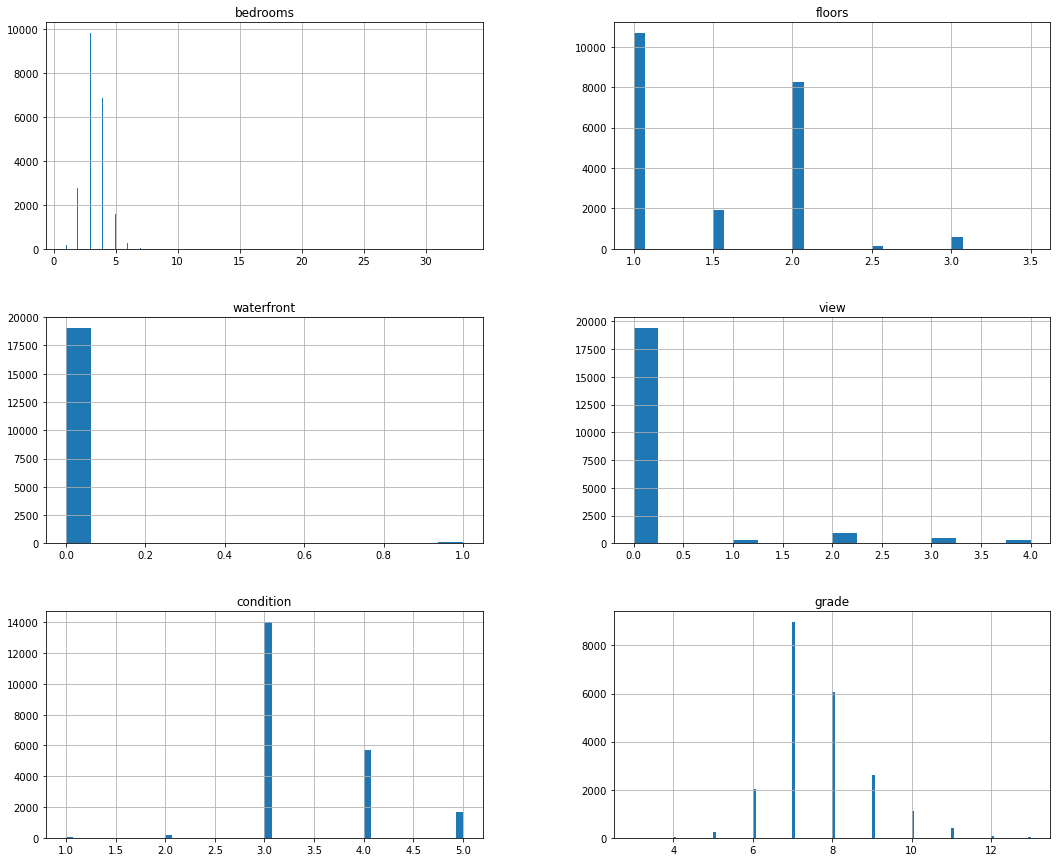

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# It appears all but waterfront are categorical variables with cardinal values
# Waterfront is the only binary variable


df[low_nunique].hist(figsize=(18,15), bins='auto');
# fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12,8))
# for ax, col in zip(axes.flatten(), df[low_nunique]):    
#     ax.hist(x=df[low_nunique])
    

In [10]:
df_cat=df[low_nunique]
df_cat

,bedrooms,floors,waterfront,view,condition,grade
0,3,1.00,nan,0.00,3,7
1,3,2.00,0.00,0.00,3,7
2,2,1.00,0.00,0.00,3,6
3,4,1.00,0.00,0.00,5,7
4,3,1.00,0.00,0.00,3,8
...,...,...,...,...,...,...
21592,3,3.00,0.00,0.00,3,8
21593,4,2.00,0.00,0.00,3,8
21594,2,2.00,0.00,0.00,3,7
21595,3,2.00,nan,0.00,3,8


# SCRUB

In [11]:
# pip install missingno

<AxesSubplot:>

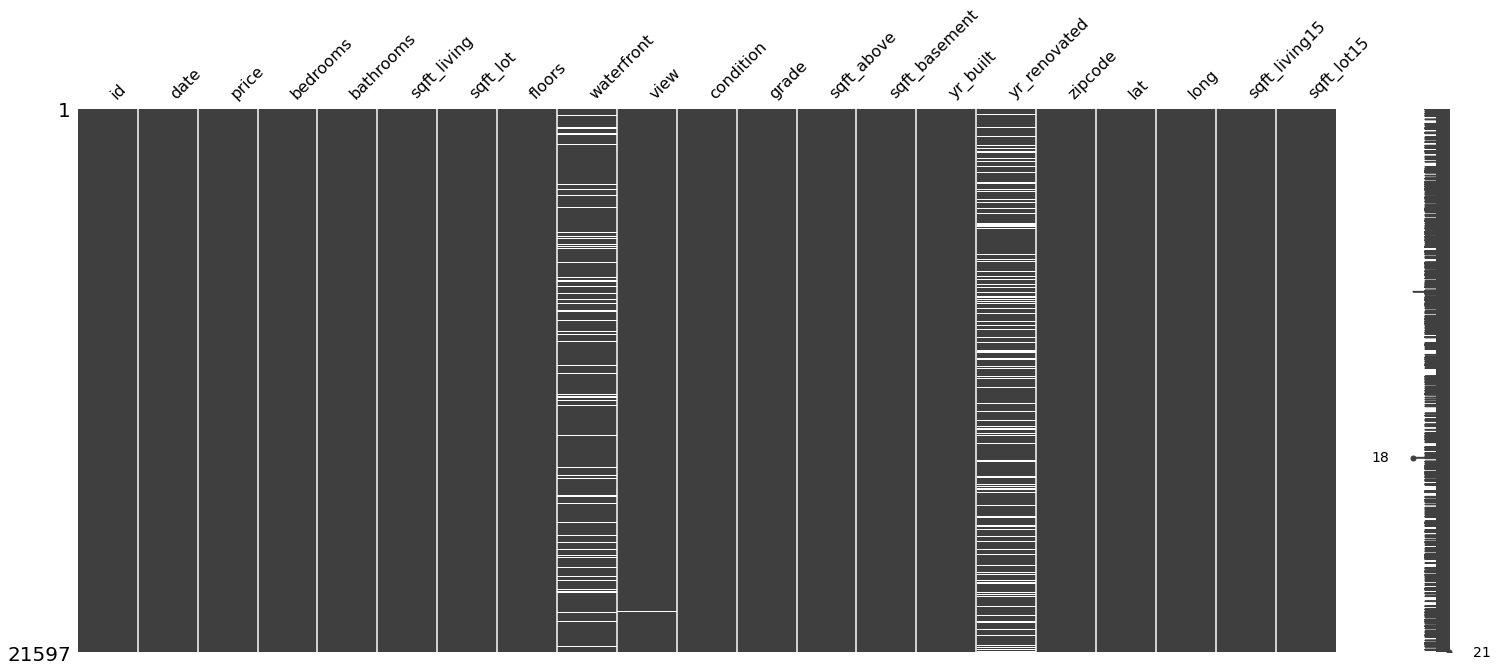

In [12]:
# Start checking for null values

# Waterfront, view, and yr_renovated are the only columns with missing data

import missingno
missingno.matrix(df)

In [13]:
null = df.isna().sum()
null[null>1]

waterfront      2376
view              63
yr_renovated    3842
dtype: int64

In [14]:
# It appears the null values in the 'view' column are random

print(df['view'].value_counts(1))
df[df['view'].isnull()]

0.00   0.90
2.00   0.04
3.00   0.02
1.00   0.02
4.00   0.01
Name: view, dtype: float64


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7,2008000270,2015-01-15,291850.00,3,1.50,1060,9711,1.00,0.00,nan,3,7,1060,0.0,1963,0.00,98198,47.41,-122.31,1650,9711
114,8961960160,2014-10-28,480000.00,4,2.50,3230,16171,2.00,0.00,nan,3,9,2520,710.0,2001,0.00,98001,47.32,-122.25,2640,8517
129,7853210060,2015-04-06,430000.00,4,2.50,2070,4310,2.00,0.00,nan,3,7,2070,0.0,2004,0.00,98065,47.53,-121.85,1970,3748
205,3456000310,2014-08-04,840000.00,4,1.75,2480,11010,1.00,0.00,nan,4,9,1630,850.0,1966,nan,98040,47.54,-122.22,2770,10744
487,1895000260,2014-07-21,207950.00,2,2.00,890,5000,1.00,0.00,nan,3,6,890,0.0,1917,0.00,98118,47.52,-122.26,1860,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19989,148000475,2014-05-28,1400000.00,4,3.25,4700,9160,1.00,0.00,nan,3,11,2520,2180.0,2005,0.00,98116,47.57,-122.41,2240,8700
20148,291310170,2014-08-04,384500.00,3,2.50,1600,2610,2.00,0.00,nan,3,8,1600,0.0,2005,nan,98027,47.53,-122.07,1445,1288
20380,1196003740,2014-09-24,734000.00,5,4.25,4110,42755,2.00,0.00,nan,3,10,2970,1140.0,2000,nan,98023,47.34,-122.34,2730,12750
21057,3448900290,2014-08-28,636230.00,4,2.50,2840,6284,2.00,0.00,nan,3,9,2840,0.0,2013,0.00,98056,47.51,-122.17,2790,7168


In [15]:
# No pattern to yr_renovated null values. Must account for 17,011 yr_renovated being 0. I am going to conclude
# that 0 simply means the home has not been renovated ever, similar to the null values

print(df['yr_renovated'].value_counts())
df[df['yr_renovated'].isnull()]

0.00       17011
2014.00       73
2003.00       31
2013.00       31
2007.00       30
           ...  
1946.00        1
1959.00        1
1971.00        1
1951.00        1
1954.00        1
Name: yr_renovated, Length: 70, dtype: int64


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0.00,0.00,3,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
12,114101516,2014-05-28,310000.00,3,1.00,1430,19901,1.50,0.00,0.00,4,7,1430,0.0,1927,nan,98028,47.76,-122.23,1780,12697
23,8091400200,2014-05-16,252700.00,2,1.50,1070,9643,1.00,nan,0.00,3,7,1070,0.0,1985,nan,98030,47.35,-122.17,1220,8386
26,1794500383,2014-06-26,937000.00,3,1.75,2450,2691,2.00,0.00,0.00,3,8,1750,700.0,1915,nan,98119,47.64,-122.36,1760,3573
28,5101402488,2014-06-24,438000.00,3,1.75,1520,6380,1.00,0.00,0.00,3,7,790,730.0,1948,nan,98115,47.70,-122.30,1520,6235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21576,1931300412,2015-04-16,475000.00,3,2.25,1190,1200,3.00,0.00,0.00,3,8,1190,0.0,2008,nan,98103,47.65,-122.35,1180,1224
21577,8672200110,2015-03-17,1090000.00,5,3.75,4170,8142,2.00,0.00,2.00,3,10,4170,0.0,2006,nan,98056,47.54,-122.18,3030,7980
21579,1972201967,2014-10-31,520000.00,2,2.25,1530,981,3.00,0.00,0.00,3,8,1480,50.0,2006,nan,98103,47.65,-122.35,1530,1282
21581,191100405,2015-04-21,1580000.00,4,3.25,3410,10125,2.00,0.00,0.00,3,10,3410,?,2007,nan,98040,47.57,-122.22,2290,10125


In [16]:
# Handle waterfront null values

In [17]:
print('Has view of water (Latitude)')
print(df[df['waterfront']==1.0]['lat'].describe())
print('------------------------------------------')
print('Does not have view of water (Latitude)')
print(df[df['waterfront']==0.0]['lat'].describe())
print('------------------------------------------')
print('Has view of water (Price)')
print(df[df['waterfront']==1.0]['price'].describe())
print('------------------------------------------')
print('Does not have view of water')
print(df[df['waterfront']==0.0]['price'].describe())

Has view of water (Latitude)
count   146.00
mean     47.54
std       0.11
min      47.33
25%      47.45
50%      47.55
75%      47.61
max      47.77
Name: lat, dtype: float64
------------------------------------------
Does not have view of water (Latitude)
count   19075.00
mean       47.56
std         0.14
min        47.16
25%        47.47
50%        47.57
75%        47.68
max        47.78
Name: lat, dtype: float64
------------------------------------------
Has view of water (Price)
count       146.00
mean    1717214.73
std     1145384.86
min      285000.00
25%      827500.00
50%     1510000.00
75%     2282500.00
max     7060000.00
Name: price, dtype: float64
------------------------------------------
Does not have view of water
count     19075.00
mean     532641.99
std      344959.18
min       78000.00
25%      320000.00
50%      450000.00
75%      638600.00
max     7700000.00
Name: price, dtype: float64


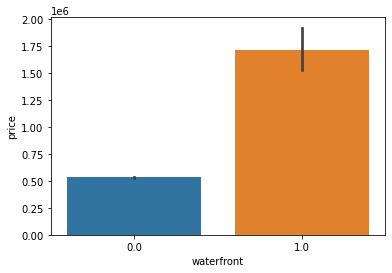

In [18]:
sns.barplot(data=df, x='waterfront', y='price');

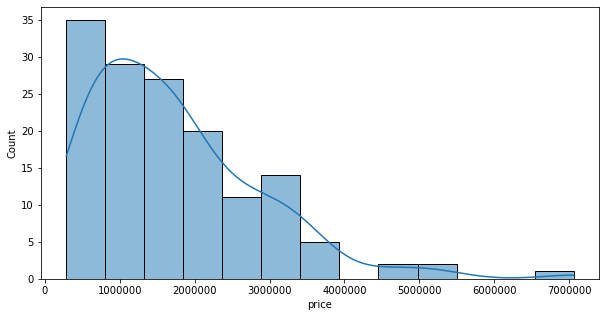

In [19]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
df_has_water = df[df['waterfront']==1]
fig, ax=plt.subplots(figsize=(10,5))
sns.histplot(data=df_has_water, x='price', kde=True, ax=ax)
ax.ticklabel_format(style='plain')
# formatter = FuncFormatter(millions)

# ax.xaxis.set_major_formatter(formatter)
# ax.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

In [20]:
# Waterfront is binary. 1 is house has a view of waterfront, 0 is opposite. Nan values are equivalent to 0

print(df['waterfront'].value_counts())
df[df['waterfront'].isnull()]

0.00    19075
1.00      146
Name: waterfront, dtype: int64


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,nan,0.00,3,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
10,1736800520,2015-04-03,662500.00,3,2.50,3560,9796,1.00,nan,0.00,3,8,1860,1700.0,1965,0.00,98007,47.60,-122.14,2210,8925
23,8091400200,2014-05-16,252700.00,2,1.50,1070,9643,1.00,nan,0.00,3,7,1070,0.0,1985,nan,98030,47.35,-122.17,1220,8386
40,5547700270,2014-07-15,625000.00,4,2.50,2570,5520,2.00,nan,0.00,3,9,2570,0.0,2000,nan,98074,47.61,-122.03,2470,5669
55,9822700295,2014-05-12,885000.00,4,2.50,2830,5000,2.00,nan,0.00,3,9,2830,0.0,1995,0.00,98105,47.66,-122.29,1950,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21578,5087900040,2014-10-17,350000.00,4,2.75,2500,5995,2.00,nan,0.00,3,8,2500,0.0,2008,0.00,98042,47.37,-122.11,2530,5988
21582,8956200760,2014-10-13,541800.00,4,2.50,3118,7866,2.00,nan,2.00,3,9,3118,0.0,2014,0.00,98001,47.29,-122.26,2673,6500
21586,844000965,2014-06-26,224000.00,3,1.75,1500,11968,1.00,nan,0.00,3,6,1500,0.0,2014,0.00,98010,47.31,-122.00,1320,11303
21587,7852140040,2014-08-25,507250.00,3,2.50,2270,5536,2.00,nan,0.00,3,8,2270,0.0,2003,0.00,98065,47.54,-121.88,2270,5731


In [21]:
mplus_water =len(df[(df['price']>1000000) & df['waterfront']==1.0])
print(f'Number of houses over $1,000,000 with waterfront view:\t{mplus_water}')
mminus_water = len(df[(df['price']<1000000) & df['waterfront']==1.0])
print(f'Number of houses under $1,000,000 with waterfront view:\t{mminus_water}')

Number of houses over $1,000,000 with waterfront view:	96
Number of houses under $1,000,000 with waterfront view:	49


In [22]:
# Going to impute categorical variables the probability that they appear in the dataset
# Begin with waterfront and functionize

# Prior count below:
# 0.00    19075
# 1.00      146
pd.set_option('display.float_format', lambda x: '%.5f' % x)
# Prob of having waterfront view for homes over $1,000,000
print('$1M+ with waterfront');
print(df.loc[df['price']>1000000]['waterfront'].value_counts(1));
print('------------------------------------------')
# Prob of having waterfront view for homes under $1,000,000
print('$1M- with waterfront');
print(df.loc[df['price']<1000000]['waterfront'].value_counts(1))

$1M+ with waterfront
0.00000   0.92666
1.00000   0.07334
Name: waterfront, dtype: float64
------------------------------------------
$1M- with waterfront
0.00000   0.99726
1.00000   0.00274
Name: waterfront, dtype: float64


In [23]:
def impute_cat(df, col):
    val_prob = dict(df[col].value_counts(1))
    prob = list(val_prob.values())
    val = list(val_prob.keys())
    np.random.choice(val, p=prob)
    df[col].fillna(np.random.choice(val, p=prob), inplace=True)
    return df

In [24]:
df['sqft_basement'].replace(to_replace='?', value=np.nan,inplace=True)
impute_cat(df, 'sqft_basement')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00000,3,1.00000,1180,5650,1.00000,nan,0.00000,3,7,1180,0.0,1955,0.00000,98178,47.51120,-122.25700,1340,5650
1,6414100192,2014-12-09,538000.00000,3,2.25000,2570,7242,2.00000,0.00000,0.00000,3,7,2170,400.0,1951,1991.00000,98125,47.72100,-122.31900,1690,7639
2,5631500400,2015-02-25,180000.00000,2,1.00000,770,10000,1.00000,0.00000,0.00000,3,6,770,0.0,1933,nan,98028,47.73790,-122.23300,2720,8062
3,2487200875,2014-12-09,604000.00000,4,3.00000,1960,5000,1.00000,0.00000,0.00000,5,7,1050,910.0,1965,0.00000,98136,47.52080,-122.39300,1360,5000
4,1954400510,2015-02-18,510000.00000,3,2.00000,1680,8080,1.00000,0.00000,0.00000,3,8,1680,0.0,1987,0.00000,98074,47.61680,-122.04500,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.00000,3,2.50000,1530,1131,3.00000,0.00000,0.00000,3,8,1530,0.0,2009,0.00000,98103,47.69930,-122.34600,1530,1509
21593,6600060120,2015-02-23,400000.00000,4,2.50000,2310,5813,2.00000,0.00000,0.00000,3,8,2310,0.0,2014,0.00000,98146,47.51070,-122.36200,1830,7200
21594,1523300141,2014-06-23,402101.00000,2,0.75000,1020,1350,2.00000,0.00000,0.00000,3,7,1020,0.0,2009,0.00000,98144,47.59440,-122.29900,1020,2007
21595,291310100,2015-01-16,400000.00000,3,2.50000,1600,2388,2.00000,nan,0.00000,3,8,1600,0.0,2004,0.00000,98027,47.53450,-122.06900,1410,1287


In [25]:
df_1mplus=df.loc[df['price']>1000000]
df_1mminus=df.loc[df['price']<1000000]

In [26]:
df_1mplus.isna().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront       149
view               6
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated     265
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
dtype: int64

In [27]:
df_1mplus =impute_cat(df_1mplus, 'waterfront')

/Users/ethankunin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [28]:
df_1mplus.isna().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               6
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated     265
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
dtype: int64

In [29]:
df_1mminus['waterfront'] =df_1mminus['waterfront'].fillna(0)

<ipython-input-29-d246c886c934>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1mminus['waterfront'] =df_1mminus['waterfront'].fillna(0)


In [30]:
df_1mminus.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               57
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3570
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [31]:
df=pd.concat([df_1mminus, df_1mplus])

In [32]:
# Handle view null values
# The number of times the home has been viewed by possible buyers

In [33]:
impute_cat(df, 'view')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00000,3,1.00000,1180,5650,1.00000,0.00000,0.00000,3,7,1180,0.0,1955,0.00000,98178,47.51120,-122.25700,1340,5650
1,6414100192,2014-12-09,538000.00000,3,2.25000,2570,7242,2.00000,0.00000,0.00000,3,7,2170,400.0,1951,1991.00000,98125,47.72100,-122.31900,1690,7639
2,5631500400,2015-02-25,180000.00000,2,1.00000,770,10000,1.00000,0.00000,0.00000,3,6,770,0.0,1933,nan,98028,47.73790,-122.23300,2720,8062
3,2487200875,2014-12-09,604000.00000,4,3.00000,1960,5000,1.00000,0.00000,0.00000,5,7,1050,910.0,1965,0.00000,98136,47.52080,-122.39300,1360,5000
4,1954400510,2015-02-18,510000.00000,3,2.00000,1680,8080,1.00000,0.00000,0.00000,3,8,1680,0.0,1987,0.00000,98074,47.61680,-122.04500,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21574,7430200100,2014-05-14,1220000.00000,4,3.50000,4910,9444,1.50000,0.00000,0.00000,3,11,3110,1800.0,2007,0.00000,98074,47.65020,-122.06600,4560,11063
21577,8672200110,2015-03-17,1090000.00000,5,3.75000,4170,8142,2.00000,0.00000,2.00000,3,10,4170,0.0,2006,nan,98056,47.53540,-122.18100,3030,7980
21581,191100405,2015-04-21,1580000.00000,4,3.25000,3410,10125,2.00000,0.00000,0.00000,3,10,3410,790.0,2007,nan,98040,47.56530,-122.22300,2290,10125
21584,249000205,2014-10-15,1540000.00000,5,3.75000,4470,8088,2.00000,0.00000,0.00000,3,11,4470,0.0,2008,0.00000,98004,47.63210,-122.20000,2780,8964


In [34]:
# Consider 0 to mean the home has not been renovated
# Conservativley determined null values should be considered non-renovated homes

df['yr_renovated'].value_counts().sort_values(ascending=False).nlargest(30)

0.00000       16988
2014.00000       73
2003.00000       31
2013.00000       31
2007.00000       30
2000.00000       29
2005.00000       29
1990.00000       22
2004.00000       22
2009.00000       21
1989.00000       20
2006.00000       20
2002.00000       17
1998.00000       16
1984.00000       16
2010.00000       15
1983.00000       15
2001.00000       15
1999.00000       15
2008.00000       15
1991.00000       15
2015.00000       14
1985.00000       14
1986.00000       14
1987.00000       14
1994.00000       14
1992.00000       13
1993.00000       12
1997.00000       12
1995.00000       12
Name: yr_renovated, dtype: int64

In [35]:
df['yr_renovated'].fillna(0, inplace=True)

In [36]:
# No null values remaining

In [37]:
# Check for duplicate values

In [38]:
# I found duplicates in the id column. I interpreted them as changes in the listing because the characterestics
# were the same outside of the date. I decided to keep 'last' because that reflects the most recent listing

pd.set_option('display.max_rows', 500)

df[df.duplicated(subset=['id'],keep=False)]
df=df.drop_duplicates(subset=['id'], keep='last')


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [39]:
# df.sort_values(by='total_rooms', ascending=False)
df=df.drop(15856)

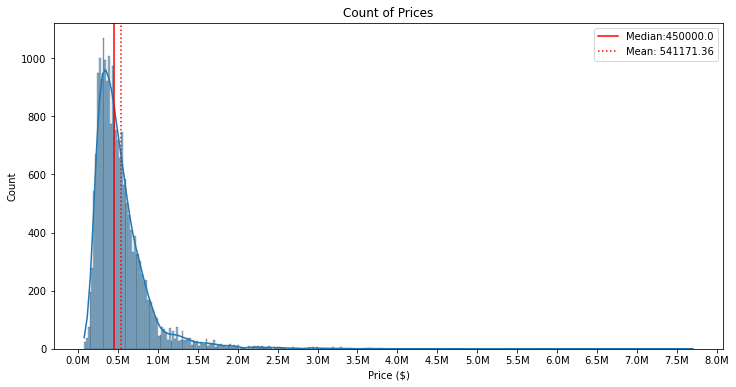

In [40]:
# Feature Engineer expensive vs. inexpensive home
# Right skew shown by graph and confirmed by mean being greater than median

from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker

def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

fig, ax=plt.subplots(figsize=(12,6))

# ax.hist(x=df['price'], bins=70, density=True)
sns.histplot(data=df, x='price', bins='auto', kde=True)
formatter = FuncFormatter(millions)
ax.xaxis.set_major_formatter(formatter)

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 500000))
df_price_mean = round(df['price'].mean(),2)
ax.axvline(df['price'].median(), color='red',label=f"Median:{df['price'].median()}")
ax.axvline(df['price'].mean(), color='red', ls=':', label=f"Mean: {df_price_mean}")
ax.set_xlabel('Price ($)')
ax.set_title('Count of Prices')
ax.legend();

In [41]:
df['Exp_inexp'] = (df['price']>df['price'].median()).map({True:True,
                                                         False:False})
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Exp_inexp
0,7129300520,2014-10-13,221900.00000,3,1.00000,1180,5650,1.00000,0.00000,0.00000,3,7,1180,0.0,1955,0.00000,98178,47.51120,-122.25700,1340,5650,False
1,6414100192,2014-12-09,538000.00000,3,2.25000,2570,7242,2.00000,0.00000,0.00000,3,7,2170,400.0,1951,1991.00000,98125,47.72100,-122.31900,1690,7639,True
2,5631500400,2015-02-25,180000.00000,2,1.00000,770,10000,1.00000,0.00000,0.00000,3,6,770,0.0,1933,0.00000,98028,47.73790,-122.23300,2720,8062,False
3,2487200875,2014-12-09,604000.00000,4,3.00000,1960,5000,1.00000,0.00000,0.00000,5,7,1050,910.0,1965,0.00000,98136,47.52080,-122.39300,1360,5000,True
4,1954400510,2015-02-18,510000.00000,3,2.00000,1680,8080,1.00000,0.00000,0.00000,3,8,1680,0.0,1987,0.00000,98074,47.61680,-122.04500,1800,7503,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21574,7430200100,2014-05-14,1220000.00000,4,3.50000,4910,9444,1.50000,0.00000,0.00000,3,11,3110,1800.0,2007,0.00000,98074,47.65020,-122.06600,4560,11063,True
21577,8672200110,2015-03-17,1090000.00000,5,3.75000,4170,8142,2.00000,0.00000,2.00000,3,10,4170,0.0,2006,0.00000,98056,47.53540,-122.18100,3030,7980,True
21581,191100405,2015-04-21,1580000.00000,4,3.25000,3410,10125,2.00000,0.00000,0.00000,3,10,3410,790.0,2007,0.00000,98040,47.56530,-122.22300,2290,10125,True
21584,249000205,2014-10-15,1540000.00000,5,3.75000,4470,8088,2.00000,0.00000,0.00000,3,11,4470,0.0,2008,0.00000,98004,47.63210,-122.20000,2780,8964,True


In [42]:
# Total rooms
# Do addition, multiplication would create too large of a SD. ie (2 beds 1 bath=3, 4 beds 1 bath=5)
df['total_rooms'] = df['bedrooms']+df['bathrooms']
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Exp_inexp,total_rooms
0,7129300520,2014-10-13,221900.00000,3,1.00000,1180,5650,1.00000,0.00000,0.00000,3,7,1180,0.0,1955,0.00000,98178,47.51120,-122.25700,1340,5650,False,4.00000
1,6414100192,2014-12-09,538000.00000,3,2.25000,2570,7242,2.00000,0.00000,0.00000,3,7,2170,400.0,1951,1991.00000,98125,47.72100,-122.31900,1690,7639,True,5.25000
2,5631500400,2015-02-25,180000.00000,2,1.00000,770,10000,1.00000,0.00000,0.00000,3,6,770,0.0,1933,0.00000,98028,47.73790,-122.23300,2720,8062,False,3.00000
3,2487200875,2014-12-09,604000.00000,4,3.00000,1960,5000,1.00000,0.00000,0.00000,5,7,1050,910.0,1965,0.00000,98136,47.52080,-122.39300,1360,5000,True,7.00000
4,1954400510,2015-02-18,510000.00000,3,2.00000,1680,8080,1.00000,0.00000,0.00000,3,8,1680,0.0,1987,0.00000,98074,47.61680,-122.04500,1800,7503,True,5.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21574,7430200100,2014-05-14,1220000.00000,4,3.50000,4910,9444,1.50000,0.00000,0.00000,3,11,3110,1800.0,2007,0.00000,98074,47.65020,-122.06600,4560,11063,True,7.50000
21577,8672200110,2015-03-17,1090000.00000,5,3.75000,4170,8142,2.00000,0.00000,2.00000,3,10,4170,0.0,2006,0.00000,98056,47.53540,-122.18100,3030,7980,True,8.75000
21581,191100405,2015-04-21,1580000.00000,4,3.25000,3410,10125,2.00000,0.00000,0.00000,3,10,3410,790.0,2007,0.00000,98040,47.56530,-122.22300,2290,10125,True,7.25000
21584,249000205,2014-10-15,1540000.00000,5,3.75000,4470,8088,2.00000,0.00000,0.00000,3,11,4470,0.0,2008,0.00000,98004,47.63210,-122.20000,2780,8964,True,8.75000


In [43]:
# Had erroniously stated 33 bedrooms and 1.5 bathrooms
# df=df.drop(15856)
df.sort_values(by='total_rooms', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Exp_inexp,total_rooms
8537,424049043,2014-08-11,450000.00000,9,7.50000,4050,6504,2.00000,0.00000,0.00000,3,7,4050,0.0,1996,0.00000,98144,47.59230,-122.30100,1448,3866,False,16.50000
13301,627300145,2014-08-14,1150000.00000,10,5.25000,4590,10920,1.00000,0.00000,2.00000,3,9,2500,2090.0,2008,0.00000,98004,47.58610,-122.11300,2730,10400,True,15.25000
12764,1225069038,2014-05-05,2280000.00000,7,8.00000,13540,307752,3.00000,0.00000,4.00000,3,12,9410,4130.0,1999,0.00000,98053,47.66750,-121.98600,4850,217800,True,15.00000
8748,1773100755,2014-08-21,520000.00000,11,3.00000,3000,4960,2.00000,0.00000,0.00000,3,7,2400,600.0,1918,1999.00000,98106,47.55600,-122.36300,1420,4960,True,14.00000
7245,6762700020,2014-10-13,7700000.00000,6,8.00000,12050,27600,2.50000,0.00000,3.00000,4,13,8570,3480.0,1910,1987.00000,98102,47.62980,-122.32300,3940,8800,True,14.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973,5101404170,2014-11-13,200000.00000,1,0.75000,680,9600,1.00000,0.00000,0.00000,3,5,680,0.0,1947,0.00000,98115,47.69640,-122.30600,1580,6624,False,1.75000
9811,3598600049,2015-04-24,224000.00000,1,0.75000,840,7203,1.50000,0.00000,0.00000,3,6,840,0.0,1949,0.00000,98168,47.47560,-122.30100,1560,8603,False,1.75000
8614,6303400395,2015-01-30,325000.00000,1,0.75000,410,8636,1.00000,0.00000,0.00000,2,4,410,0.0,1953,0.00000,98146,47.50770,-122.35700,1190,8636,False,1.75000
10469,7129304375,2014-07-14,202000.00000,1,0.75000,590,5650,1.00000,0.00000,0.00000,3,6,590,0.0,1944,0.00000,98118,47.51810,-122.26700,980,5650,False,1.75000


In [44]:
def distr_(df, col):
    fig, ax = plt.subplots(figsize=(8,7), nrows=3, gridspec_kw={'height_ratios': [2,1,4]});
    mean=df[col].mean()
    median=df[col].median()
    max_=df[col].max()
    min_=df[col].min()
    std_=df[col].std()
    sns.histplot(df[col],alpha=0.5,stat='density',ax=ax[0]);
    sns.kdeplot(df[col],color='green',ax=ax[0]);
    ax[0].set_xlabel(col)
    ax[0].set_title(f'{col} Distribution')
    ax[0].axvline(mean, label=f'Mean: {mean}', c='red')
    ax[0].axvline(median, label=f'median: {median}', c='red', linestyle=':')
    ax[0].legend()
    
    sns.boxplot(data=df, x=col, ax=ax[1]);
    
    sns.scatterplot(data=df, x=df[col], y=df['price']);
    
    fig.tight_layout();
    print(f'{col} Summary')
    print(f'Median: {median}')
    print(f'Mean: {mean:.4}')
    print(f'Max: {max_}')
    print(f'Min: {min_}')
    print(f'Std: {std_:.4}')
    return fig, ax;

total_rooms Summary
Median: 5.5
Mean: 5.49
Max: 16.5
Min: 1.5
Std: 1.463


(<Figure size 576x504 with 3 Axes>,
 array([<AxesSubplot:title={'center':'total_rooms Distribution'}, xlabel='total_rooms', ylabel='Density'>,
        <AxesSubplot:xlabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='price'>], dtype=object))

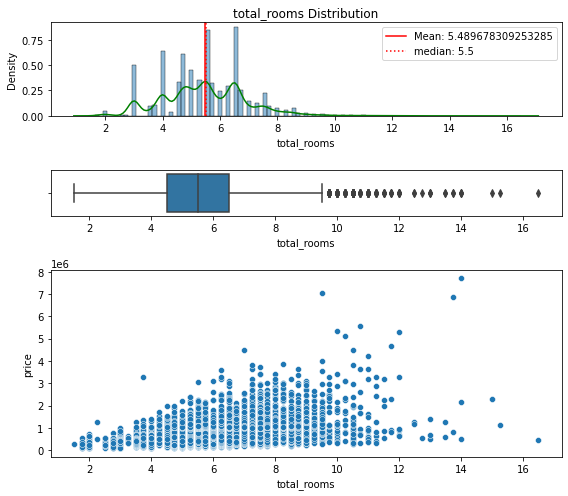

In [45]:
distr_(df, 'total_rooms')

In [46]:
# SQF vs. neighborhood average Living
df.columns
df['living_comparison'] = df['sqft_living']/df['sqft_living15']


living_comparison Summary
Median: 1.0
Mean: 1.054
Max: 6.0
Min: 0.1872791519434629
Std: 0.3203


(<Figure size 576x504 with 3 Axes>,
 array([<AxesSubplot:title={'center':'living_comparison Distribution'}, xlabel='living_comparison', ylabel='Density'>,
        <AxesSubplot:xlabel='living_comparison'>,
        <AxesSubplot:xlabel='living_comparison', ylabel='price'>],
       dtype=object))

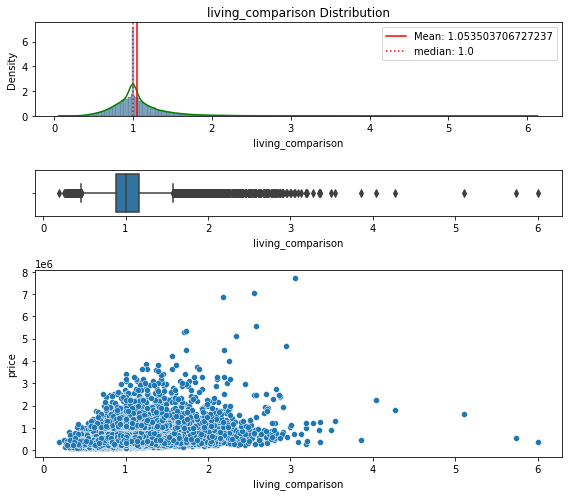

In [47]:
distr_(df, 'living_comparison')

In [48]:
# # SQF vs. neighborhood average Lot
df.columns
df['lot_comparison'] = df['sqft_lot']/df['sqft_lot15']


In [49]:
# After identifying outliers I removed sqft_lot greater than 50,000

df = df[df['sqft_lot']<=499571]

lot_comparison Summary
Median: 1.0
Mean: 1.121
Max: 44.389137737961924
Min: 0.054971997700810314
Std: 0.9953


(<Figure size 576x504 with 3 Axes>,
 array([<AxesSubplot:title={'center':'lot_comparison Distribution'}, xlabel='lot_comparison', ylabel='Density'>,
        <AxesSubplot:xlabel='lot_comparison'>,
        <AxesSubplot:xlabel='lot_comparison', ylabel='price'>],
       dtype=object))

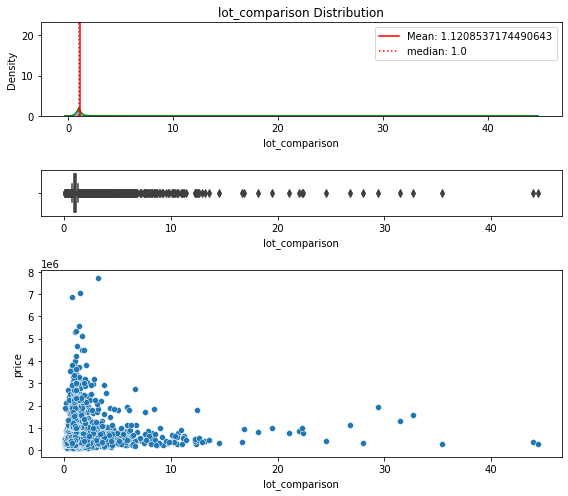

In [50]:
distr_(df, 'lot_comparison')

live_lot Summary
Median: 0.24821440015816315
Mean: 0.3247
Max: 4.653846153846154
Min: 0.002123452828675107
Std: 0.2691


<ipython-input-51-3d7e76fcad6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['live_lot'] = df['sqft_living']/df['sqft_lot']


(<Figure size 576x504 with 3 Axes>,
 array([<AxesSubplot:title={'center':'live_lot Distribution'}, xlabel='live_lot', ylabel='Density'>,
        <AxesSubplot:xlabel='live_lot'>,
        <AxesSubplot:xlabel='live_lot', ylabel='price'>], dtype=object))

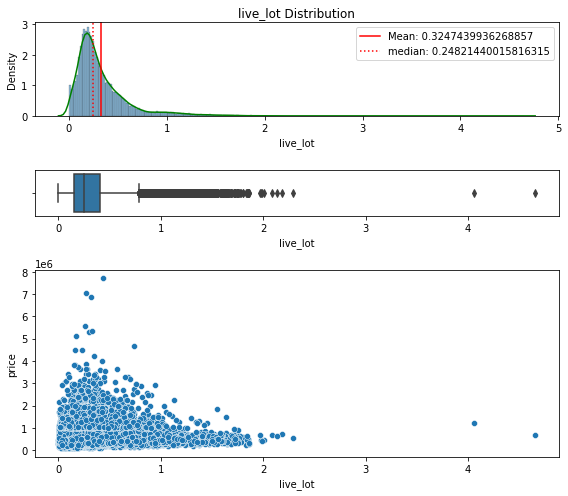

In [51]:
# SQF vs. lot size
df['live_lot'] = df['sqft_living']/df['sqft_lot']
distr_(df, 'live_lot')

In [52]:
# Renovation recency
df.columns
df['yr_renovated']
def ren_recency(year):
    if year != 0:
        return 2021-int(year)
    else:
        return 0

In [53]:
df['ren_recency'] = df['yr_renovated'].map(ren_recency)

<ipython-input-53-7c1642f345ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ren_recency'] = df['yr_renovated'].map(ren_recency)


In [54]:
df.sort_values(by='ren_recency', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Exp_inexp,total_rooms,living_comparison,lot_comparison,live_lot,ren_recency
13723,4475800065,2014-06-13,459950.00000,3,1.75000,1850,6869,1.00000,0.00000,2.00000,5,6,1100,750.0,1919,1934.00000,98166,47.46480,-122.36300,1850,10096,True,4.75000,1.00000,0.68037,0.26933,87
7150,2754700170,2014-08-04,443500.00000,2,1.00000,1330,4140,1.00000,0.00000,0.00000,4,7,930,400.0,1919,1940.00000,98115,47.68020,-122.30600,1410,5100,False,3.00000,0.94326,0.81176,0.32126,81
6455,148000440,2014-08-18,313300.00000,2,1.00000,970,4800,1.00000,0.00000,0.00000,3,6,970,0.0,1911,1940.00000,98116,47.57540,-122.41400,1180,5900,False,3.00000,0.82203,0.81356,0.20208,81
14846,7625701830,2014-10-23,521000.00000,3,2.00000,1840,6000,1.00000,0.00000,0.00000,4,6,1840,0.0,1908,1944.00000,98136,47.55080,-122.39200,2010,6000,True,5.00000,0.91542,1.00000,0.30667,77
1786,7211400990,2015-03-03,256000.00000,2,1.00000,860,5000,1.00000,0.00000,0.00000,3,6,860,0.0,1915,1945.00000,98146,47.51330,-122.35600,1220,5000,False,3.00000,0.70492,1.00000,0.17200,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825,3343300180,2015-03-30,469000.00000,3,2.00000,1300,22605,1.00000,0.00000,0.00000,3,7,1300,0.0,1998,0.00000,98056,47.53370,-122.18700,2250,10215,True,5.00000,0.57778,2.21292,0.05751,0
7824,3423600065,2014-06-04,540000.00000,3,1.00000,1050,4160,1.00000,0.00000,0.00000,4,7,1050,0.0,1925,0.00000,98115,47.67560,-122.30000,1580,3680,True,4.00000,0.66456,1.13043,0.25240,0
7823,2568300266,2014-05-30,659000.00000,4,2.50000,3190,11375,1.00000,0.00000,0.00000,5,8,2210,980.0,1946,0.00000,98125,47.70400,-122.30000,1100,8500,True,6.50000,2.90000,1.33824,0.28044,0
7822,3830210220,2014-09-08,210000.00000,3,1.00000,1200,7200,1.00000,0.00000,0.00000,3,6,1200,0.0,1977,0.00000,98030,47.37460,-122.18300,1200,7420,False,4.00000,1.00000,0.97035,0.16667,0


In [55]:
df_renovated = df[df['ren_recency']>0]

ren_recency Summary
Median: 21.0
Mean: 24.93
Max: 87
Min: 6
Std: 15.55


(<Figure size 576x504 with 3 Axes>,
 array([<AxesSubplot:title={'center':'ren_recency Distribution'}, xlabel='ren_recency', ylabel='Density'>,
        <AxesSubplot:xlabel='ren_recency'>,
        <AxesSubplot:xlabel='ren_recency', ylabel='price'>], dtype=object))

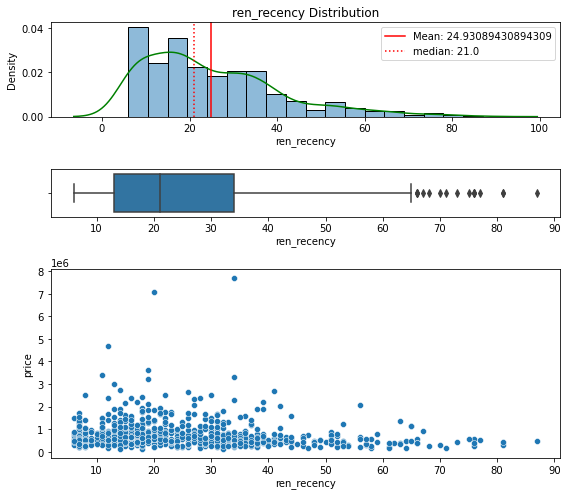

In [56]:
distr_(df_renovated, 'ren_recency')

## Pre-processing

In [57]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

from scipy import stats
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols

In [58]:
df_model = df.copy()

In [59]:
num_cols = ['bedrooms', 'bathrooms', 'sqft_living',
            'sqft_lot', 'floors', 'view', 'condition', 'grade',
            'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
            'sqft_living15', 'sqft_lot15', 'total_rooms', 'living_comparison', 
            'lot_comparison', 'live_lot','ren_recency']

In [60]:
df_model = df_model.rename({'waterfront_1.0':'waterfront_1'}, axis=1)
df_model.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Exp_inexp,total_rooms,living_comparison,lot_comparison,live_lot,ren_recency
0,7129300520,2014-10-13,221900.00000,3,1.00000,1180,5650,1.00000,0.00000,0.00000,3,7,1180,0.0,1955,0.00000,98178,47.51120,-122.25700,1340,5650,False,4.00000,0.88060,1.00000,0.20885,0
1,6414100192,2014-12-09,538000.00000,3,2.25000,2570,7242,2.00000,0.00000,0.00000,3,7,2170,400.0,1951,1991.00000,98125,47.72100,-122.31900,1690,7639,True,5.25000,1.52071,0.94803,0.35487,30
2,5631500400,2015-02-25,180000.00000,2,1.00000,770,10000,1.00000,0.00000,0.00000,3,6,770,0.0,1933,0.00000,98028,47.73790,-122.23300,2720,8062,False,3.00000,0.28309,1.24039,0.07700,0
3,2487200875,2014-12-09,604000.00000,4,3.00000,1960,5000,1.00000,0.00000,0.00000,5,7,1050,910.0,1965,0.00000,98136,47.52080,-122.39300,1360,5000,True,7.00000,1.44118,1.00000,0.39200,0
4,1954400510,2015-02-18,510000.00000,3,2.00000,1680,8080,1.00000,0.00000,0.00000,3,8,1680,0.0,1987,0.00000,98074,47.61680,-122.04500,1800,7503,True,5.00000,0.93333,1.07690,0.20792,0


In [61]:
# Run an initial linear regression simply with numeric columns, unstandardized
# Outliers not removed

In [62]:
 x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
           'view', 'condition', 'grade', 'sqft_above','yr_built',
           'yr_renovated', 'sqft_living15', 'sqft_lot15', 'total_rooms',
           'living_comparison', 'lot_comparison', 'live_lot', 'ren_recency']

In [63]:
# Function to standardize model summary
def model_summary(df, X_targets, y):
    outcome = y
    x_cols = X_targets
    predictors = '+'.join(x_cols)
    formula = outcome + '~' + predictors
    model = ols(formula=formula, data=df).fit()
    return model.summary()

In [64]:
baseline_numeric = model_summary(df_model,X_targets=x_cols, y='price')
baseline_numeric

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     2357.
Date:                Mon, 12 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:30:31   Log-Likelihood:            -2.9281e+05
No. Observations:               21366   AIC:                         5.856e+05
Df Residuals:                   21348   BIC:                         5.858e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          6.647e+06   1.39e+05     47.696      0.000    6.37e+06    6.92e+06
bedrooms          -3.875e+04   2045.324    -18.948      0.000   -4.28e+04   -3.47e+04
bathrooms          4.175e+04   2613.544     15.973      0.000    3.66e+04    4.69e+04
sqft_living         302.0355      7.940     38.041      0.000     286.473     317.598
sqft_lot             -0.1774      0.091     -1.959      0.050      -0.355       0.000
floors            -1.585e+04   4650.520     -3.408      0.001    -2.5e+04   -6735.703
view               6.874e+04   2126.332     32.329      0.000    6.46e+04    7.29e+04
condition           2.44e+04   2526.903      9.656      0.000    1.94e+04    2.94e+04
grade              1.152e+05   2299.037     50.121      0.000    1.11e+05     1.2e+05
sqft_above           28.6511      4.947      5.791      0.000      18.954      38.348
yr_built          -3630.1494     71.108    -51.051      0.000   -3769.527   -3490.772
yr_renovated         56.2940      7.669      7.340      0.000      41.261      71.327
sqft_living15      -136.8310      7.936    -17.242      0.000    -152.386    -121.276
sqft_lot15           -0.1307      0.108     -1.210      0.226      -0.342       0.081
total_rooms        2992.8224   1266.666      2.363      0.018     510.063    5475.582
living_comparison -3.189e+05   1.34e+04    -23.782      0.000   -3.45e+05   -2.93e+05
lot_comparison     2578.9204   1840.738      1.401      0.161   -1029.064    6186.905
live_lot           1.357e+05   8099.631     16.753      0.000     1.2e+05    1.52e+05
ren_recency       -2476.3608    509.629     -4.859      0.000   -3475.271   -1477.450
==============================================================================
Omnibus:                    15257.791   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           825589.933
Skew:                           2.865   Prob(JB):                         0.00
Kurtosis:                      32.909   Cond. No.                     3.10e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.17e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [65]:
# Intercept is not statistically significant
# Statistically insignificant predictors: bedrooms, bathrooms, sqft. lot, floors, sqft_basement, yr_renovated
# sqft_lot15, total_rooms, ren_recency

# How should we handle predictors taht have a substanial amount of 0 values?

In [66]:
# sm.graphics.qqplot(model.resid,dist=stats.norm,line='45',fit=True);

In [67]:
scaler = StandardScaler()
scaler

StandardScaler()

In [68]:
df_scaled = df_model.copy()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])
df_scaled

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Exp_inexp,total_rooms,living_comparison,lot_comparison,live_lot,ren_recency
0,7129300520,2014-10-13,221900.00000,-0.41213,-1.45495,-0.98231,-0.27055,-0.91750,0.00000,-0.30494,-0.63135,-0.56445,-0.73675,-0.68182,-0.54859,-0.18914,98178,47.51120,-122.25700,-0.94468,-0.27229,False,-1.01851,-0.54121,-0.12143,-0.43068,-0.15972
1,6414100192,2014-12-09,538000.00000,-0.41213,0.17268,0.53242,-0.22107,0.93432,0.00000,-0.30494,-0.63135,-0.56445,0.45983,0.21975,-0.68477,5.27282,98125,47.72100,-122.31900,-0.43411,-0.19399,True,-0.16370,1.46692,-0.17364,0.11197,5.40447
2,5631500400,2015-02-25,180000.00000,-1.52001,-1.45495,-1.42910,-0.13535,-0.91750,0.00000,-0.30494,-0.63135,-1.41909,-1.23230,-0.68182,-1.29760,-0.18914,98028,47.73790,-122.23300,1.06845,-0.17734,False,-1.70235,-2.41568,0.12010,-0.92065,-0.15972
3,2487200875,2014-12-09,604000.00000,0.69576,1.14926,-0.13232,-0.29075,-0.91750,0.00000,-0.30494,2.44843,-0.56445,-0.89388,1.36925,-0.20812,-0.18914,98136,47.52080,-122.39300,-0.91551,-0.29788,True,1.03304,1.21741,-0.12143,0.24993,-0.15972
4,1954400510,2015-02-18,510000.00000,-0.41213,-0.15284,-0.43744,-0.19502,-0.91750,0.00000,-0.30494,-0.63135,0.29020,-0.13241,-0.68182,0.54089,-0.18914,98074,47.61680,-122.04500,-0.27364,-0.19935,True,-0.33466,-0.37577,-0.04416,-0.43413,-0.15972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21574,7430200100,2014-05-14,1220000.00000,0.69576,1.80032,3.08240,-0.15263,0.00841,0.00000,-0.30494,-0.63135,2.85415,1.59598,3.37524,1.22181,-0.18914,98074,47.65020,-122.06600,3.75262,-0.05920,True,1.37496,0.07417,-0.26846,0.72526,-0.15972
21577,8672200110,2015-03-17,1090000.00000,1.80364,2.12584,2.27599,-0.19310,0.93432,0.00000,2.31535,-0.63135,1.99950,2.87717,-0.68182,1.18776,-0.18914,98056,47.53540,-122.18100,1.52067,-0.18057,True,2.22977,1.01369,-0.10103,0.69646,-0.15972
21581,191100405,2015-04-21,1580000.00000,0.69576,1.47479,1.44780,-0.13147,0.93432,0.00000,-0.30494,-0.63135,1.99950,1.95858,1.09878,1.22181,-0.18914,98040,47.56530,-122.22300,0.44117,-0.09613,True,1.20400,1.36770,-0.12143,0.04477,-0.15972
21584,249000205,2014-10-15,1540000.00000,1.80364,2.12584,2.60291,-0.19477,0.93432,0.00000,-0.30494,-0.63135,2.85415,3.23977,-0.68182,1.25586,-0.18914,98004,47.63210,-122.20000,1.15598,-0.14183,True,2.22977,1.74049,-0.21961,0.84701,-0.15972


In [69]:
# Create OHE for cat columns
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoder

OneHotEncoder(drop='first', sparse=False)

In [70]:
cat_cols = ['waterfront', 'Exp_inexp']

In [71]:
df_cat_ohe = encoder.fit_transform(df[cat_cols])
df_ohe = pd.DataFrame(df_cat_ohe,columns=encoder.get_feature_names(cat_cols),
                     index=df.index)
df_ohe

,waterfront_1.0,Exp_inexp_True
0,0.00000,0.00000
1,0.00000,1.00000
2,0.00000,0.00000
3,0.00000,1.00000
4,0.00000,1.00000
...,...,...
21574,0.00000,1.00000
21577,0.00000,1.00000
21581,0.00000,1.00000
21584,0.00000,1.00000


In [72]:
# Put together numeric and categorical columns 
# How does it know to drop the original columns that are categorical?

# change name for concatenated

df_scaled_catnum=pd.concat([df_scaled, df_ohe], axis=1)
df_scaled_catnum

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Exp_inexp,total_rooms,living_comparison,lot_comparison,live_lot,ren_recency,waterfront_1.0,Exp_inexp_True
0,7129300520,2014-10-13,221900.00000,-0.41213,-1.45495,-0.98231,-0.27055,-0.91750,0.00000,-0.30494,-0.63135,-0.56445,-0.73675,-0.68182,-0.54859,-0.18914,98178,47.51120,-122.25700,-0.94468,-0.27229,False,-1.01851,-0.54121,-0.12143,-0.43068,-0.15972,0.00000,0.00000
1,6414100192,2014-12-09,538000.00000,-0.41213,0.17268,0.53242,-0.22107,0.93432,0.00000,-0.30494,-0.63135,-0.56445,0.45983,0.21975,-0.68477,5.27282,98125,47.72100,-122.31900,-0.43411,-0.19399,True,-0.16370,1.46692,-0.17364,0.11197,5.40447,0.00000,1.00000
2,5631500400,2015-02-25,180000.00000,-1.52001,-1.45495,-1.42910,-0.13535,-0.91750,0.00000,-0.30494,-0.63135,-1.41909,-1.23230,-0.68182,-1.29760,-0.18914,98028,47.73790,-122.23300,1.06845,-0.17734,False,-1.70235,-2.41568,0.12010,-0.92065,-0.15972,0.00000,0.00000
3,2487200875,2014-12-09,604000.00000,0.69576,1.14926,-0.13232,-0.29075,-0.91750,0.00000,-0.30494,2.44843,-0.56445,-0.89388,1.36925,-0.20812,-0.18914,98136,47.52080,-122.39300,-0.91551,-0.29788,True,1.03304,1.21741,-0.12143,0.24993,-0.15972,0.00000,1.00000
4,1954400510,2015-02-18,510000.00000,-0.41213,-0.15284,-0.43744,-0.19502,-0.91750,0.00000,-0.30494,-0.63135,0.29020,-0.13241,-0.68182,0.54089,-0.18914,98074,47.61680,-122.04500,-0.27364,-0.19935,True,-0.33466,-0.37577,-0.04416,-0.43413,-0.15972,0.00000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21574,7430200100,2014-05-14,1220000.00000,0.69576,1.80032,3.08240,-0.15263,0.00841,0.00000,-0.30494,-0.63135,2.85415,1.59598,3.37524,1.22181,-0.18914,98074,47.65020,-122.06600,3.75262,-0.05920,True,1.37496,0.07417,-0.26846,0.72526,-0.15972,0.00000,1.00000
21577,8672200110,2015-03-17,1090000.00000,1.80364,2.12584,2.27599,-0.19310,0.93432,0.00000,2.31535,-0.63135,1.99950,2.87717,-0.68182,1.18776,-0.18914,98056,47.53540,-122.18100,1.52067,-0.18057,True,2.22977,1.01369,-0.10103,0.69646,-0.15972,0.00000,1.00000
21581,191100405,2015-04-21,1580000.00000,0.69576,1.47479,1.44780,-0.13147,0.93432,0.00000,-0.30494,-0.63135,1.99950,1.95858,1.09878,1.22181,-0.18914,98040,47.56530,-122.22300,0.44117,-0.09613,True,1.20400,1.36770,-0.12143,0.04477,-0.15972,0.00000,1.00000
21584,249000205,2014-10-15,1540000.00000,1.80364,2.12584,2.60291,-0.19477,0.93432,0.00000,-0.30494,-0.63135,2.85415,3.23977,-0.68182,1.25586,-0.18914,98004,47.63210,-122.20000,1.15598,-0.14183,True,2.22977,1.74049,-0.21961,0.84701,-0.15972,0.00000,1.00000


In [73]:
df_scaled_catnum = df_scaled_catnum.drop(['id', 'date','zipcode','lat', 'long'],axis=1)

In [74]:
df_scaled_catnum = df_scaled_catnum.rename({'waterfront_1.0':'waterfront_1'}, axis=1)
df_scaled_catnum

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,Exp_inexp,total_rooms,living_comparison,lot_comparison,live_lot,ren_recency,waterfront_1,Exp_inexp_True
0,221900.00000,-0.41213,-1.45495,-0.98231,-0.27055,-0.91750,0.00000,-0.30494,-0.63135,-0.56445,-0.73675,-0.68182,-0.54859,-0.18914,-0.94468,-0.27229,False,-1.01851,-0.54121,-0.12143,-0.43068,-0.15972,0.00000,0.00000
1,538000.00000,-0.41213,0.17268,0.53242,-0.22107,0.93432,0.00000,-0.30494,-0.63135,-0.56445,0.45983,0.21975,-0.68477,5.27282,-0.43411,-0.19399,True,-0.16370,1.46692,-0.17364,0.11197,5.40447,0.00000,1.00000
2,180000.00000,-1.52001,-1.45495,-1.42910,-0.13535,-0.91750,0.00000,-0.30494,-0.63135,-1.41909,-1.23230,-0.68182,-1.29760,-0.18914,1.06845,-0.17734,False,-1.70235,-2.41568,0.12010,-0.92065,-0.15972,0.00000,0.00000
3,604000.00000,0.69576,1.14926,-0.13232,-0.29075,-0.91750,0.00000,-0.30494,2.44843,-0.56445,-0.89388,1.36925,-0.20812,-0.18914,-0.91551,-0.29788,True,1.03304,1.21741,-0.12143,0.24993,-0.15972,0.00000,1.00000
4,510000.00000,-0.41213,-0.15284,-0.43744,-0.19502,-0.91750,0.00000,-0.30494,-0.63135,0.29020,-0.13241,-0.68182,0.54089,-0.18914,-0.27364,-0.19935,True,-0.33466,-0.37577,-0.04416,-0.43413,-0.15972,0.00000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21574,1220000.00000,0.69576,1.80032,3.08240,-0.15263,0.00841,0.00000,-0.30494,-0.63135,2.85415,1.59598,3.37524,1.22181,-0.18914,3.75262,-0.05920,True,1.37496,0.07417,-0.26846,0.72526,-0.15972,0.00000,1.00000
21577,1090000.00000,1.80364,2.12584,2.27599,-0.19310,0.93432,0.00000,2.31535,-0.63135,1.99950,2.87717,-0.68182,1.18776,-0.18914,1.52067,-0.18057,True,2.22977,1.01369,-0.10103,0.69646,-0.15972,0.00000,1.00000
21581,1580000.00000,0.69576,1.47479,1.44780,-0.13147,0.93432,0.00000,-0.30494,-0.63135,1.99950,1.95858,1.09878,1.22181,-0.18914,0.44117,-0.09613,True,1.20400,1.36770,-0.12143,0.04477,-0.15972,0.00000,1.00000
21584,1540000.00000,1.80364,2.12584,2.60291,-0.19477,0.93432,0.00000,-0.30494,-0.63135,2.85415,3.23977,-0.68182,1.25586,-0.18914,1.15598,-0.14183,True,2.22977,1.74049,-0.21961,0.84701,-0.15972,0.00000,1.00000


In [75]:
# Run an intial regression with standardized data
# Include categorical variables
# What do these coeffecients show?

# from statsmodels.formula.api import ols
# outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'yr_built',
       'yr_renovated', 'sqft_living15', 'sqft_lot15', 'total_rooms',
       'living_comparison', 'lot_comparison', 'live_lot', 'ren_recency', 'waterfront_1',
        'Exp_inexp_True']
# predictors = '+'.join(x_cols)
# formula_st = outcome + '~' + predictors
# model = ols(formula=formula_st, data=df_model).fit()
# model_st.summary()

standardized_summary = model_summary(df_scaled_catnum, x_cols, 'price')
standardized_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2495.
Date:                Mon, 12 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:30:32   Log-Likelihood:            -2.9122e+05
No. Observations:               21366   AIC:                         5.825e+05
Df Residuals:                   21345   BIC:                         5.826e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          4.538e+05   2232.403    203.267      0.000    4.49e+05    4.58e+05
bedrooms           1.807e+16   2.12e+16      0.851      0.395   -2.36e+16    5.97e+16
bathrooms          1.537e+16   1.81e+16      0.851      0.395      -2e+16    5.08e+16
sqft_living         2.83e+05   6778.628     41.742      0.000     2.7e+05    2.96e+05
sqft_lot          -7467.4231   2709.389     -2.756      0.006   -1.28e+04   -2156.816
floors            -1.395e+04   2333.718     -5.978      0.000   -1.85e+04   -9376.497
view               3.219e+04   1612.770     19.962      0.000     2.9e+04    3.54e+04
condition          1.239e+04   1525.170      8.121      0.000    9396.774    1.54e+04
grade              1.066e+05   2572.079     41.464      0.000    1.02e+05    1.12e+05
sqft_above         2.859e+04   3802.746      7.518      0.000    2.11e+04     3.6e+04
yr_built            -8.3e+04   2006.855    -41.360      0.000   -8.69e+04   -7.91e+04
yr_renovated       1.879e+04   2596.307      7.239      0.000    1.37e+04    2.39e+04
sqft_living15     -1.249e+05   5126.229    -24.367      0.000   -1.35e+05   -1.15e+05
sqft_lot15        -4803.2380   2547.583     -1.885      0.059   -9796.693     190.217
total_rooms       -2.927e+16   3.44e+16     -0.851      0.395   -9.67e+16    3.82e+16
living_comparison -1.176e+05   3993.367    -29.438      0.000   -1.25e+05    -1.1e+05
lot_comparison     2796.7204   1701.141      1.644      0.100    -537.644    6131.085
live_lot           2.725e+04   2043.814     13.333      0.000    2.32e+04    3.13e+04
ren_recency       -1.341e+04   2553.276     -5.251      0.000   -1.84e+04   -8401.526
waterfront_1       6.183e+05   1.83e+04     33.792      0.000    5.82e+05    6.54e+05
Exp_inexp_True     1.664e+05   3509.853     47.401      0.000    1.59e+05    1.73e+05
==============================================================================
Omnibus:                    17427.619   Durbin-Watson:                   1.569
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1387657.977
Skew:                           3.407   Prob(JB):                         0.00
Kurtosis:                      41.888   Cond. No.                     7.88e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.06e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [76]:
# sm.graphics.qqplot(model_st.resid,dist=stats.norm,line='45',fit=True);

In [77]:
# Here we should make another DF called df_nooutliers to compare in our linear regression model
df_model.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Exp_inexp',
       'total_rooms', 'living_comparison', 'lot_comparison', 'live_lot',
       'ren_recency'],
      dtype='object')

In [78]:
# Create Df that excludes outliers as z-score>3 or zscore<3
# Pulled out price
outliers_df = pd.DataFrame()
cols=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'sqft_living15', 'sqft_lot15', 'total_rooms',
       'living_comparison', 'lot_comparison', 'live_lot', 'ren_recency',
       'waterfront_1', 'Exp_inexp_True']
for col in cols:
    outliers_df[col] = df_scaled_catnum[col].abs()>3

outliers_df['total'] =outliers_df.any(axis=1)
df_model_no = df_scaled_catnum[~outliers_df['total']].copy()

In [79]:
# How would I now add price?
# Why won't this transform back? 

df_model_no

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,Exp_inexp,total_rooms,living_comparison,lot_comparison,live_lot,ren_recency,waterfront_1,Exp_inexp_True
0,221900.00000,-0.41213,-1.45495,-0.98231,-0.27055,-0.91750,0.00000,-0.30494,-0.63135,-0.56445,-0.73675,-0.68182,-0.54859,-0.18914,-0.94468,-0.27229,False,-1.01851,-0.54121,-0.12143,-0.43068,-0.15972,0.00000,0.00000
2,180000.00000,-1.52001,-1.45495,-1.42910,-0.13535,-0.91750,0.00000,-0.30494,-0.63135,-1.41909,-1.23230,-0.68182,-1.29760,-0.18914,1.06845,-0.17734,False,-1.70235,-2.41568,0.12010,-0.92065,-0.15972,0.00000,0.00000
3,604000.00000,0.69576,1.14926,-0.13232,-0.29075,-0.91750,0.00000,-0.30494,2.44843,-0.56445,-0.89388,1.36925,-0.20812,-0.18914,-0.91551,-0.29788,True,1.03304,1.21741,-0.12143,0.24993,-0.15972,0.00000,1.00000
4,510000.00000,-0.41213,-0.15284,-0.43744,-0.19502,-0.91750,0.00000,-0.30494,-0.63135,0.29020,-0.13241,-0.68182,0.54089,-0.18914,-0.27364,-0.19935,True,-0.33466,-0.37577,-0.04416,-0.43413,-0.15972,0.00000,1.00000
6,257500.00000,-0.41213,0.17268,-0.39930,-0.23421,0.93432,0.00000,-0.30494,-0.63135,-0.56445,-0.09011,1.09878,0.81326,-0.18914,0.36531,-0.22627,False,-0.16370,-0.89974,-0.12143,-0.27217,-0.15972,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21498,1870000.00000,0.69576,2.12584,1.86190,-0.17274,0.93432,0.00000,-0.30494,-0.63135,2.85415,1.81354,0.44514,1.18776,-0.18914,0.98092,-0.01641,True,1.54592,1.16607,-0.39870,0.39423,-0.15972,0.00000,1.00000
21552,1700000.00000,0.69576,1.80032,1.90548,-0.16758,0.93432,0.00000,-0.30494,-0.63135,1.99950,1.60807,0.91847,1.46013,-0.18914,0.29529,-0.07046,True,1.37496,2.18265,-0.29054,0.38116,-0.15972,0.00000,1.00000
21577,1090000.00000,1.80364,2.12584,2.27599,-0.19310,0.93432,0.00000,2.31535,-0.63135,1.99950,2.87717,-0.68182,1.18776,-0.18914,1.52067,-0.18057,True,2.22977,1.01369,-0.10103,0.69646,-0.15972,0.00000,1.00000
21581,1580000.00000,0.69576,1.47479,1.44780,-0.13147,0.93432,0.00000,-0.30494,-0.63135,1.99950,1.95858,1.09878,1.22181,-0.18914,0.44117,-0.09613,True,1.20400,1.36770,-0.12143,0.04477,-0.15972,0.00000,1.00000


# MODEL

## Testing for assumptions

In [111]:
#https://nbviewer.jupyter.org/github/flatiron-school/Online-DS-FT-022221-Cohort-Notes/blob/master/Phase_2/topic_19_part1_multiple_regression/topic_19_Multiple_Regression_v2-SG.ipynb
# Why can't you include the target in the correlation matrix?

corr= df_model_no.corr()
df.corr()['price'].round(2).sort_values(ascending=False)

price                1.00000
sqft_living          0.70000
grade                0.67000
sqft_above           0.60000
Exp_inexp            0.60000
sqft_living15        0.58000
bathrooms            0.53000
total_rooms          0.47000
view                 0.39000
bedrooms             0.32000
lat                  0.31000
living_comparison    0.30000
waterfront           0.27000
floors               0.25000
live_lot             0.12000
yr_renovated         0.12000
sqft_lot             0.09000
sqft_lot15           0.08000
ren_recency          0.08000
yr_built             0.05000
lot_comparison       0.05000
condition            0.03000
long                 0.02000
id                  -0.02000
zipcode             -0.05000
Name: price, dtype: float64

<AxesSubplot:>

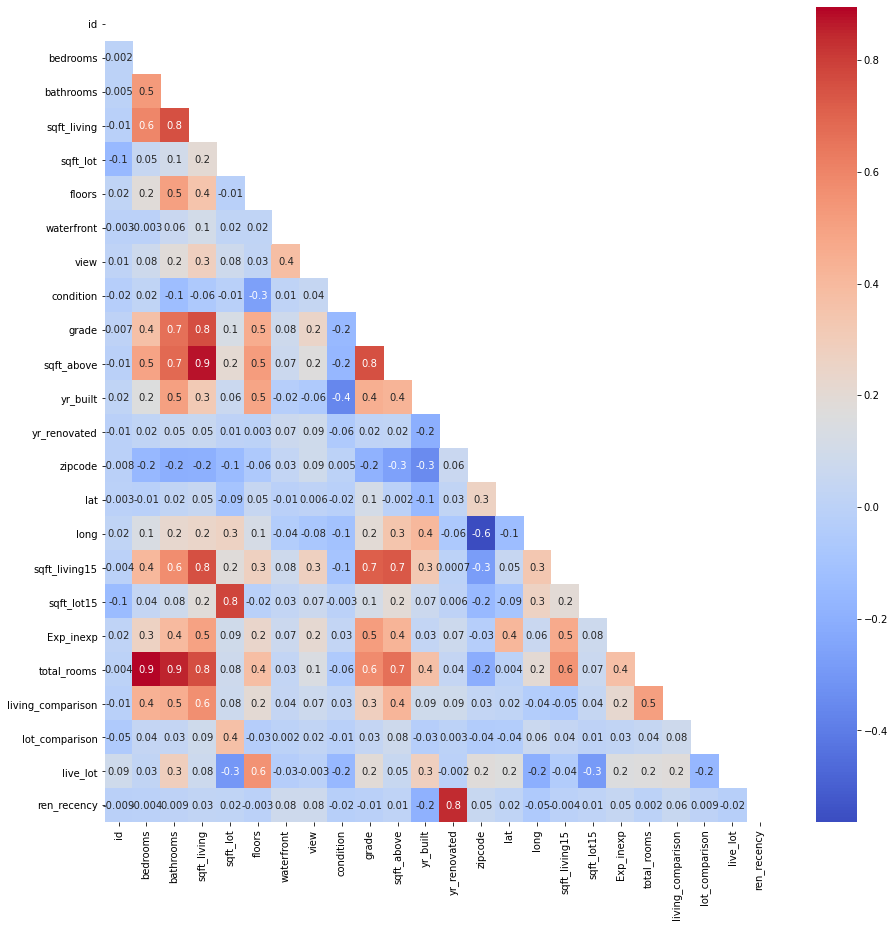

In [95]:
# change size and make it look nicer then test for colinarity
# https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07
corr2 = df_model.drop('price', axis=1).corr()

fig, ax = plt.subplots(figsize=(15,15))
matrix = np.triu(corr2)
sns.heatmap(corr2,cmap="coolwarm", annot=True, fmt='.1g', mask=matrix)

In [114]:
#https://github.com/learn-co-curriculum/dsc-multicollinearity-of-features-lab/tree/solution

df_corr2 = df_model_no.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_corr2['pairs'] = list(zip(df_corr2.level_0, df_corr2.level_1))
df_corr2.set_index(['pairs'], inplace = True)
df_corr2.drop(columns=['level_1', 'level_0'], inplace = True)

# # cc for correlation coefficient
df_corr2.columns = ['cc']
df_corr2
df_corr2.drop_duplicates(inplace=True)

df_corr2[(df_corr2.cc>.75) & (df_corr2.cc<1)]

,cc
pairs,
"(total_rooms, bedrooms)",0.89474
"(sqft_lot15, sqft_lot)",0.87750
"(sqft_above, sqft_living)",0.85880
"(total_rooms, bathrooms)",0.83632
"(sqft_living15, sqft_living)",0.77915
"(total_rooms, sqft_living)",0.76061
"(sqft_living15, sqft_above)",0.75446


In [ ]:
# Going to drop the feature that appears most often
# Drop 1: sqft_lot
# Drop 2: total_rooms
# Drop 3:sqft_living

In [118]:
df_corr2 = df_model_no.drop(['sqft_lot','total_rooms', 'sqft_living', 'sqft_living15'], axis=1).corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_corr2['pairs'] = list(zip(df_corr2.level_0, df_corr2.level_1))
df_corr2.set_index(['pairs'], inplace = True)
df_corr2.drop(columns=['level_1', 'level_0'], inplace = True)

# # cc for correlation coefficient
df_corr2.columns = ['cc']
df_corr2
df_corr2.drop_duplicates(inplace=True)

df_corr2[(df_corr2.cc>.75) & (df_corr2.cc<1)]

,cc
pairs,


In [119]:
colin_features = ['sqft_lot','total_rooms', 'sqft_living', 'sqft_living15']

In [123]:
df_nocolino = df_model_no.copy()
df_nocolino = df_nocolino.drop(colin_features, axis=1)

In [137]:
nocolinocols = df_nocolino.columns
nocolinocols = list(nocolinocols)
nocolinocols.remove('price')
nocolinocols
model_summary(df_nocolino, nocolinocols, 'price')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     2415.
Date:                Mon, 12 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:36:56   Log-Likelihood:            -2.4042e+05
No. Observations:               18130   AIC:                         4.809e+05
Df Residuals:                   18112   BIC:                         4.810e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3.903e+15   5.86e+15      0.666      0.505   -7.58e+15    1.54e+16
Exp_inexp[T.True]  2.723e+16   5.02e+16      0.542      0.588   -7.12e+16    1.26e+17
bedrooms          -1.323e+04   1443.247     -9.166      0.000   -1.61e+04   -1.04e+04
bathrooms           1.68e+04   2047.635      8.203      0.000    1.28e+04    2.08e+04
floors            -5049.6552   1857.393     -2.719      0.007   -8690.322   -1408.989
waterfront        -1.136e+13   2.36e+13     -0.481      0.630   -5.76e+13    3.49e+13
view               2.152e+04   1995.380     10.784      0.000    1.76e+04    2.54e+04
condition          1.237e+04   1144.474     10.806      0.000    1.01e+04    1.46e+04
grade              8.621e+04   2025.079     42.571      0.000    8.22e+04    9.02e+04
sqft_above          9.03e+04   2624.170     34.409      0.000    8.52e+04    9.54e+04
sqft_basement      3.696e+04   1826.239     20.239      0.000    3.34e+04    4.05e+04
yr_built          -6.508e+04   1568.124    -41.501      0.000   -6.82e+04    -6.2e+04
yr_renovated       3.189e+16   4.79e+16      0.666      0.505   -6.19e+16    1.26e+17
sqft_lot15        -6531.9516   3817.768     -1.711      0.087    -1.4e+04     951.236
living_comparison -2.201e+04   1727.201    -12.742      0.000   -2.54e+04   -1.86e+04
lot_comparison     5963.0535   3432.660      1.737      0.082    -765.286    1.27e+04
live_lot           3.036e+04   2225.126     13.642      0.000     2.6e+04    3.47e+04
ren_recency       -1.332e+16      2e+16     -0.666      0.505   -5.25e+16    2.59e+16
waterfront_1       1.136e+13   2.36e+13      0.481      0.630   -3.49e+13    5.76e+13
Exp_inexp_True    -2.723e+16   5.02e+16     -0.542      0.588   -1.26e+17    7.12e+16
==============================================================================
Omnibus:                    12566.298   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           367249.677
Skew:                           2.951   Prob(JB):                         0.00
Kurtosis:                      24.245   Cond. No.                     1.13e+29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.77e-54. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<bound method Figure.tight_layout of <Figure size 2520x3600 with 20 Axes>>

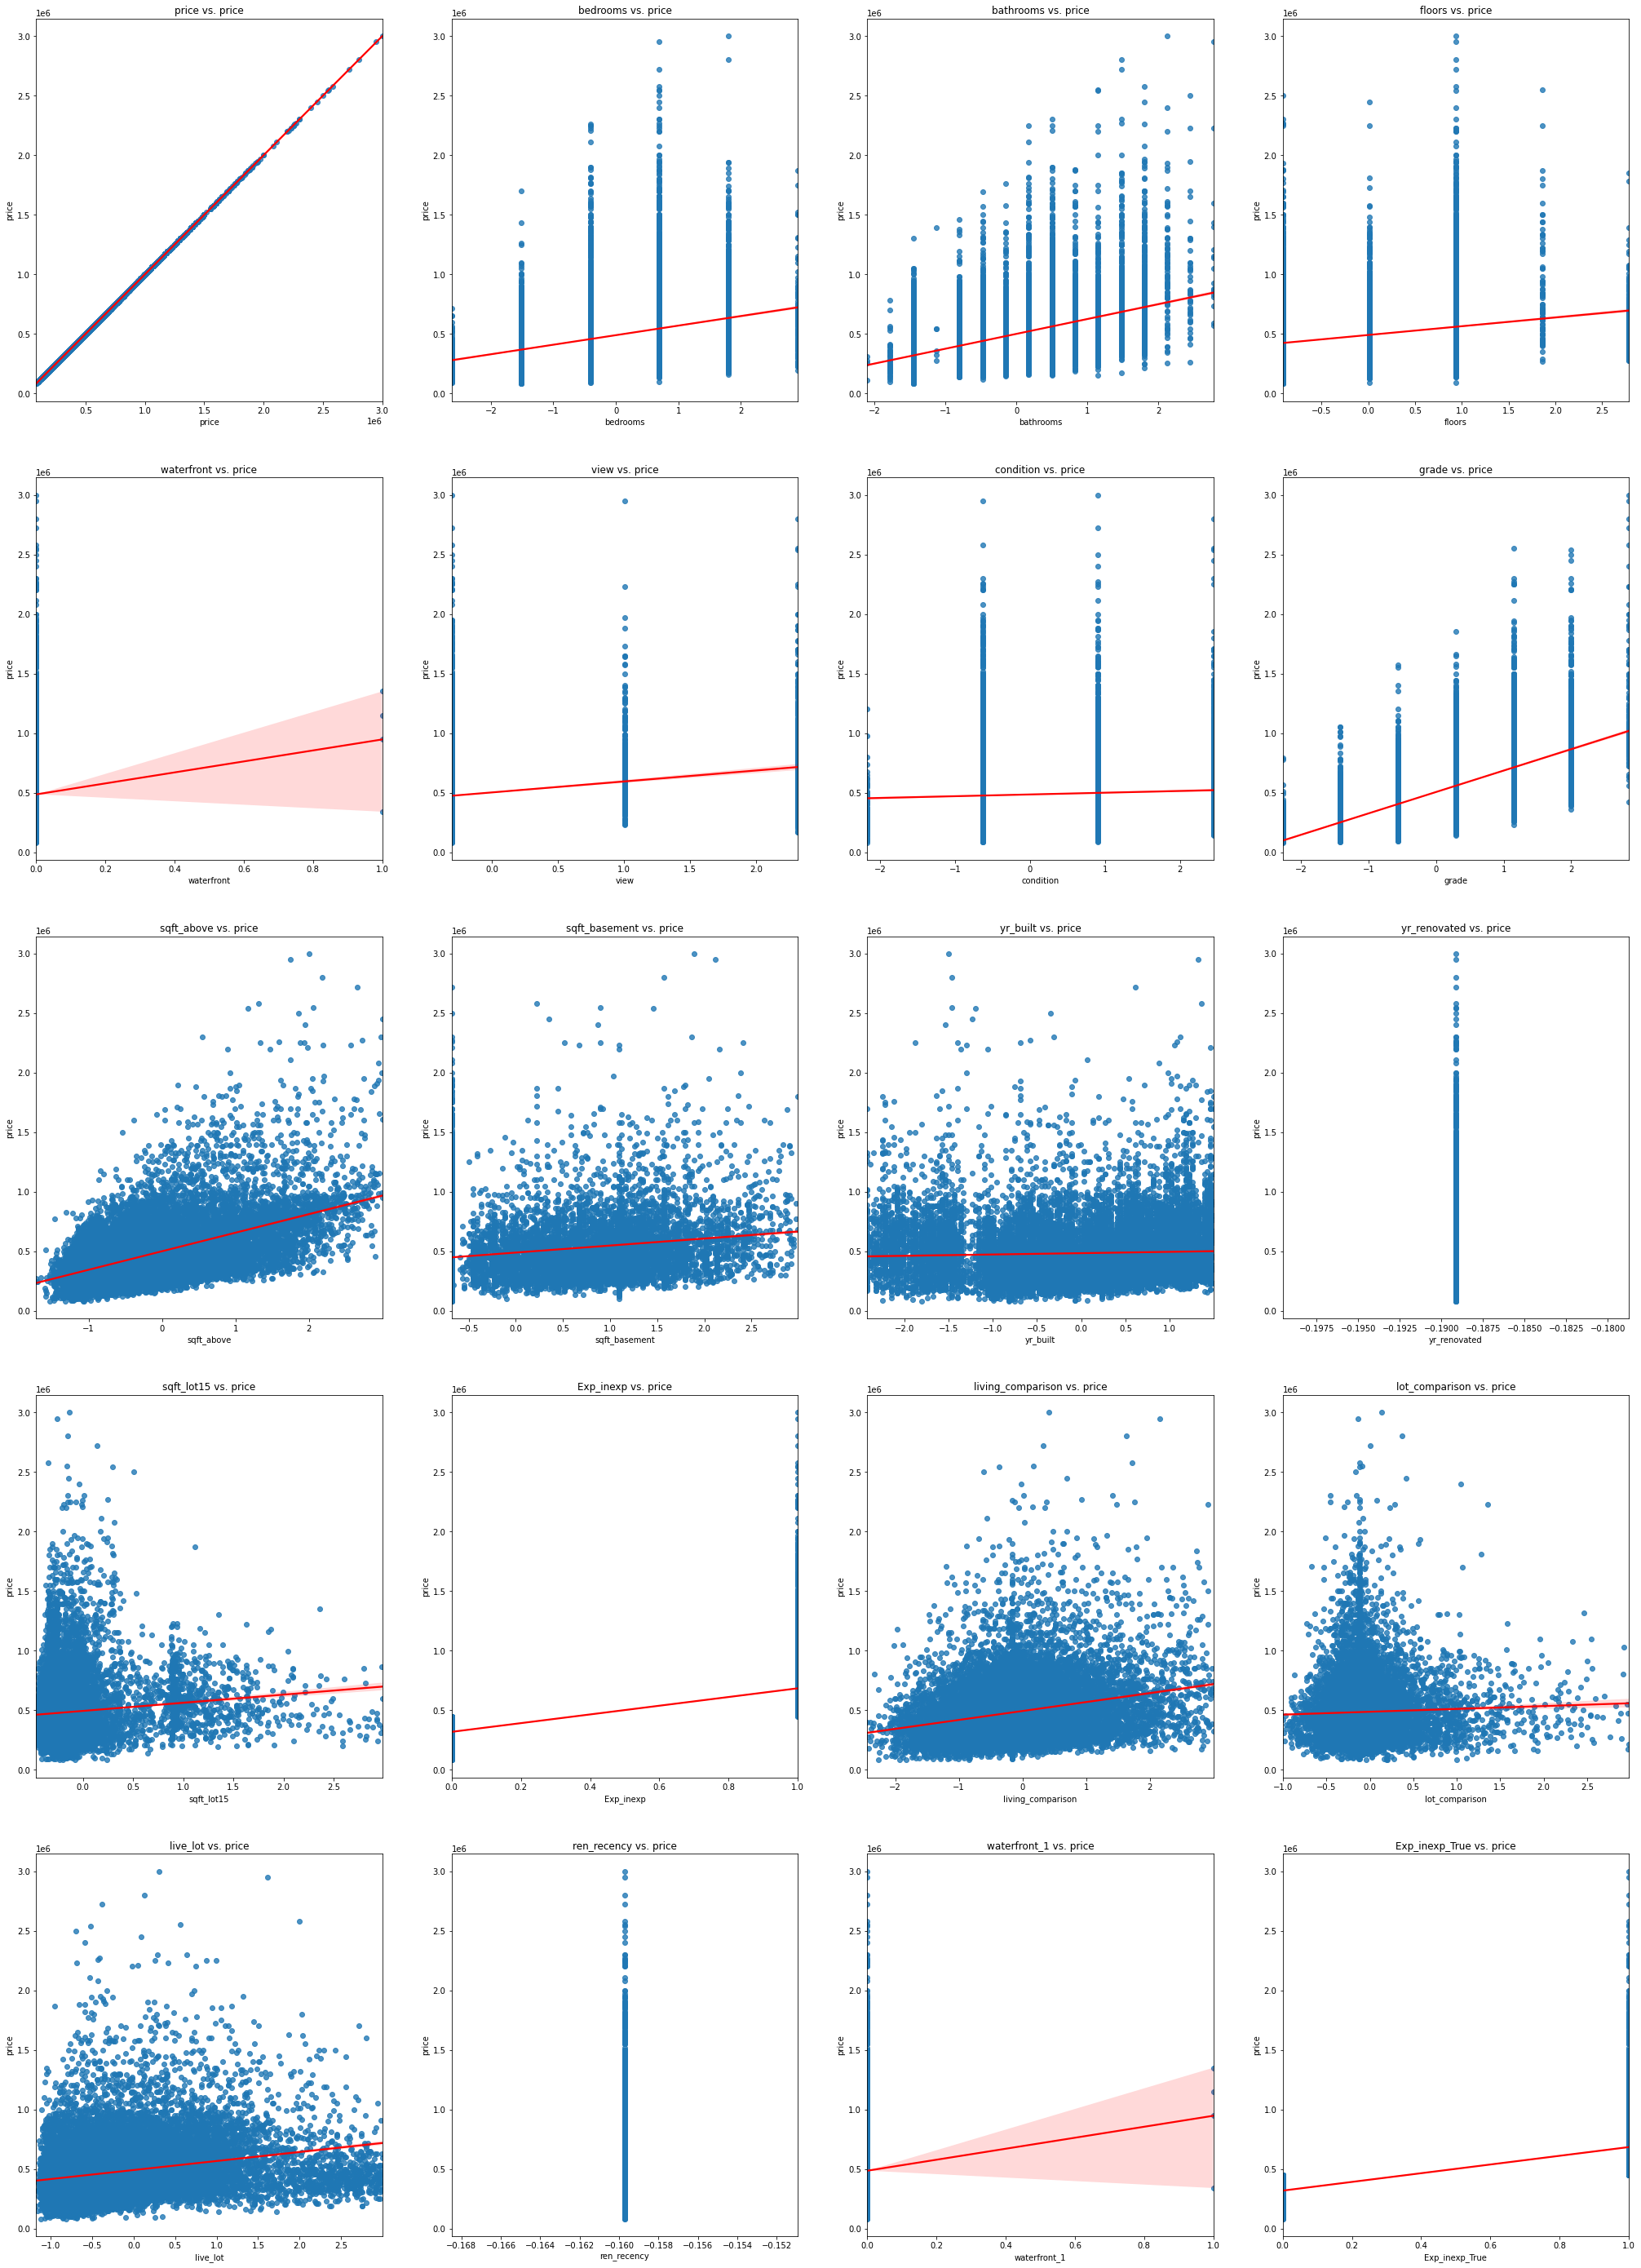

In [145]:
# Clean up price, waterfront, expensive (remove bc it is not independent)

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(35,50))
for ax, col in zip(axes.flatten(), df_nocolino.columns):
    sns.regplot(data=df_nocolino, x=col, y='price', ax=ax, line_kws={'color': 'red'})
    ax.set_title(f'{col} vs. price')
fig.tight_layout


In [ ]:
# Eventually drop price here
# Bedrooms: positive
# Bathroom: positive
# Sqft Living: positive
# Sqft Lot: unclear
# Floors: unclear
# Waterfront: unclear
# Veiw: unclear
# Condition: None
# Grade: Positive
# Sqft Above: Positive
# Sqft Basement: Unclear
# Yr Built: None
# Yr Rennovated: Unclear
# Sqft Living15: Positive
# Sqft Lot15: Unclear
# Exp_In: Unclear
# Total Rooms: Positive
# Living Comparison: Positive
# Lot Comparison: Unclear


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

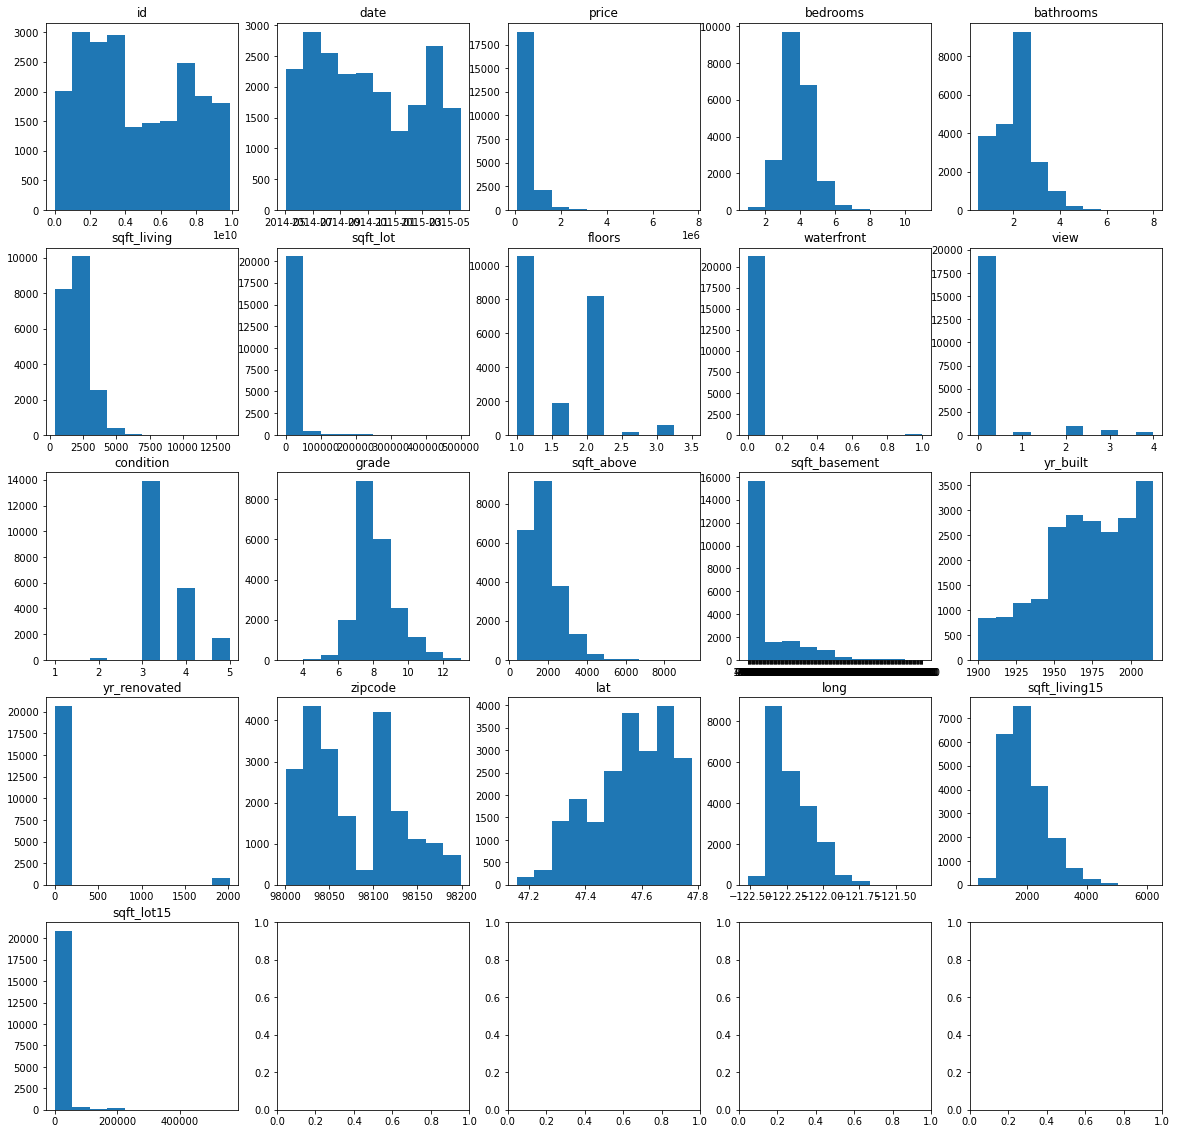

In [151]:
fig, axes = plt.subplots(figsize=(20,20), nrows=5, ncols=5)
for ax, col in zip(axes.flatten(), df.columns):
    ax.hist(x=df[col])
    ax.set_title(col)

In [163]:
# Zero columns: waterfront, view, yr_renovated, sqft_basement, ren_recency

In [146]:
# Turn into dummy variables: Floors, view, condition, basement (due to 0 vals), renovated (binary or qcut), 
# ren recency(qcut)
# Turn into zeros and then scale and remove outliers

In [162]:
for col in df.columns:
    print(f'{col}-----------------')
    res = df[col].value_counts()
    print(res[res>100])

id-----------------
Series([], Name: id, dtype: int64)
date-----------------
2014-06-23    142
2014-06-25    129
2014-06-26    127
2015-04-27    126
2015-03-25    123
2014-07-08    122
2015-04-28    121
2015-04-14    121
2014-07-09    121
2015-04-22    120
2015-04-21    119
2014-10-28    117
2014-06-24    116
2014-08-26    116
2014-07-14    114
2014-07-01    114
2014-05-20    114
2015-04-29    113
2014-08-20    112
2014-06-17    112
2014-07-29    111
2015-04-08    111
2015-04-23    110
2014-07-16    109
2014-05-28    109
2014-08-11    107
2015-03-27    107
2014-08-25    107
2014-08-05    106
2014-07-23    106
2014-06-20    106
2015-03-26    104
2014-05-27    103
2014-07-22    103
2015-04-02    103
2015-04-24    102
2014-07-15    102
2014-06-03    102
2014-08-22    101
2014-07-25    101
2015-03-24    101
2015-04-07    101
2014-06-19    101
Name: date, dtype: int64
price-----------------
450000.00000    172
350000.00000    167
550000.00000    156
500000.00000    151
425000.00000    148
3

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

# iNTERPRET

Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

# CONCLUSIONS & RECOMMENDATIONS

Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***